# "Analyzing Bike Sharing Trends"
> "Awesome summary"

- toc: false
- branch: master
- badges: false
- comments: true
- categories: [project]
- hide: false
- search_exclude: true

**plan**
* Introduction
    - outline
    - what I have found in this project
* Precprocessing
    - setup
    - modify the data
* Inspect by Time
    - hourly
    - day 
    - weekdays and weekend 
    - month
* Inspect by weather
    - season
    - weather
* Registered or not
    - hourly usage
    - usage for day
* Summary
    - what I've found 
    - further more

some setups

In [1]:
#collapse-hide
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# setting params
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 10),
          'figure.dpi': 120,
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
pd.options.display.max_colwidth = 800

from IPython.display import display, HTML

# Precprocessing

## Having a brief look at our data

[source](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [2]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* modify variable names
* converting encoding

## Modify the dataset

**Make variable names more understandable**

In [4]:
hour_df.rename(columns={"instant":"rec_id",
                        "dteday":"datetime",
                        "mnth":"month",
                        "holiday":"is_holiday",
                        "workingday":"is_workingday",
                        "weathersit":"weather_condition",
                        "hum":"humidity",
                        "yr":"year",
                        "hr":"hour",
                        "cnt":"total_count"}, inplace=True)
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

**converting the encoding of day, month, season and year to understanable names**

In [5]:
weekday_mapping = {0:"Sunday", 1:"Monday",
                   2:"Tuesday", 3:"Wednesday",
                   4:"Thursday", 5:"Friday",
                   6:"Saturday"}
season_mapping = {1:"winter", 2:"spring", 
                  3:"summer", 4:"fall"}
month_mapping = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",
                 5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
                 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
year_mapping = {0:"2011", 1:"2012"}

map_vars = ["weekday", "month", "season", "year"]
mappings = [weekday_mapping, month_mapping, 
            season_mapping, year_mapping]

for var, mapping in zip(map_vars, mappings):
    hour_df[var] = hour_df[var].map(mapping)

In [6]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,winter,2011,Jan,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,Jan,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,Jan,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,Jan,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,Jan,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**temporal data**

In [7]:
# date time conversion
hour_df["datetime"] = pd.to_datetime(hour_df.datetime)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  object        
 3   year               17379 non-null  object        
 4   month              17379 non-null  object        
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  object        
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

# Visualize Bike Usage Trends

In [8]:
def get_grouped_average(groups, selected_var=["total_count"]):
    group_df = hour_df.groupby(groups).mean()[selected_var]
    return group_df.reset_index()

## Hourly distribution of bikes usage

**total hourly usage**

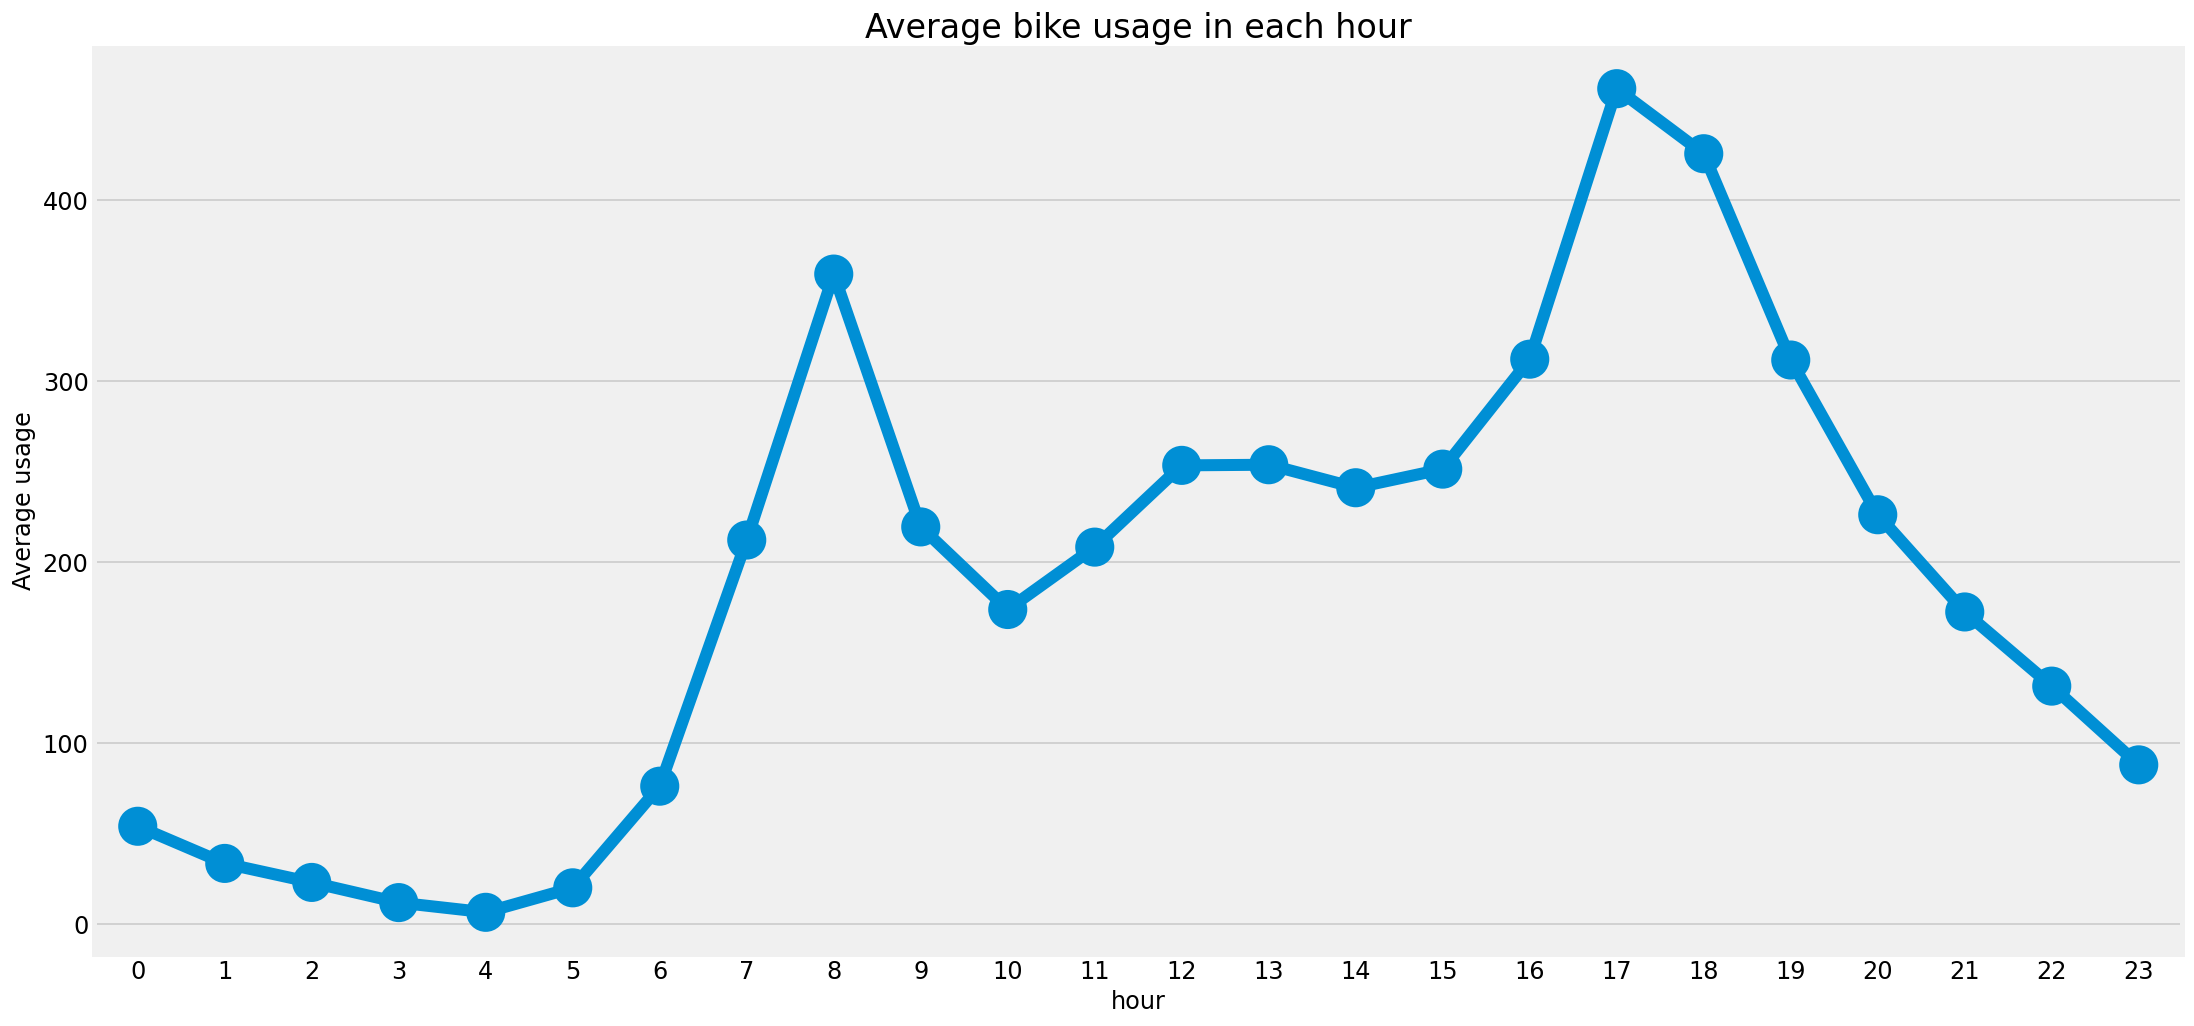

In [9]:
average_hourly = get_grouped_average(["hour"])

sns.pointplot(x="hour", y="total_count", data=average_hourly)
plt.ylabel("Average usage")
plt.title("Average bike usage in each hour", size=20);

**different days**

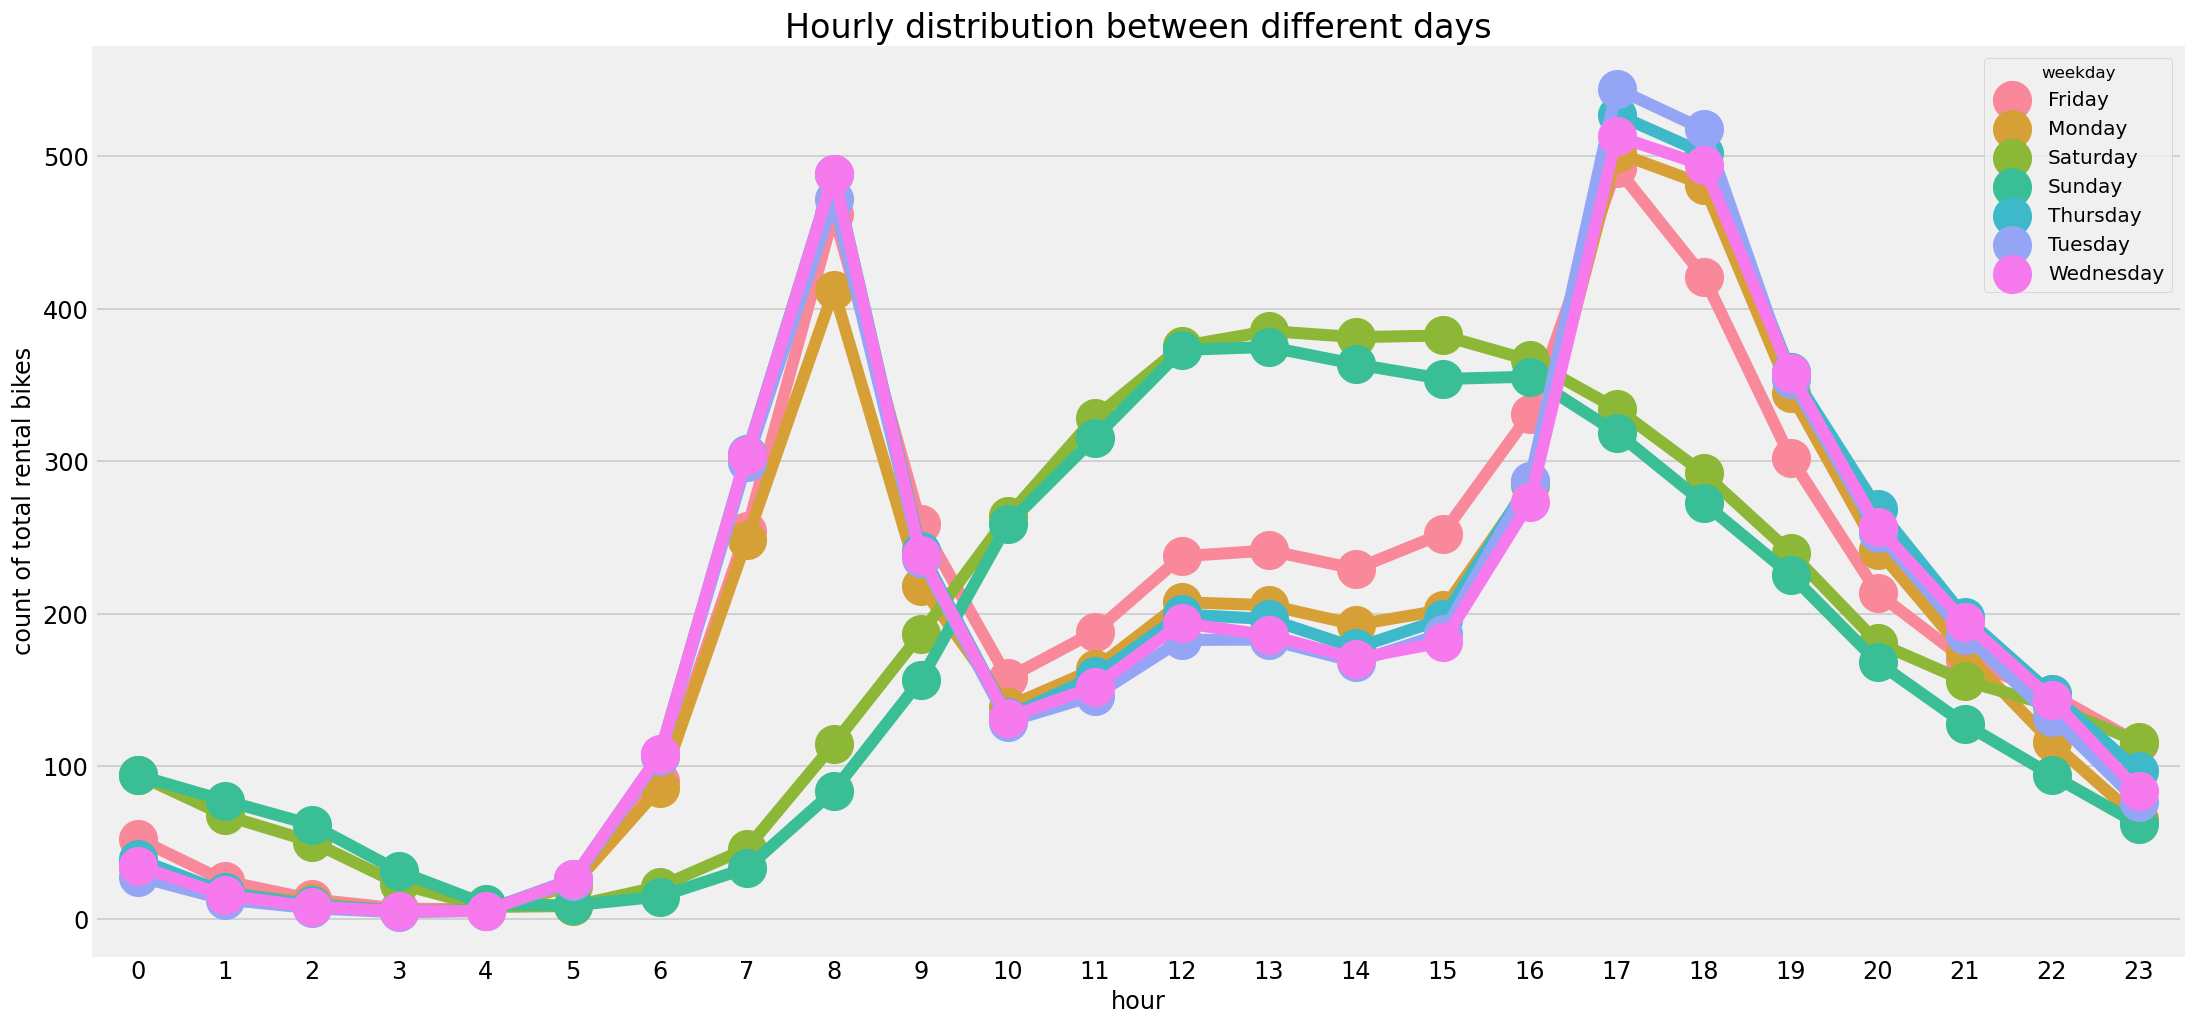

In [10]:
# hourly distribution between different weekdays
data_day = get_grouped_average(["hour", "weekday"])

# plotting
fig, ax = plt.subplots()
sns.pointplot(data=data_day, x="hour", 
              y="total_count", hue="weekday", ax=ax)
plt.ylabel("count of total rental bikes")
plt.title("Hourly distribution between different days", size=20);

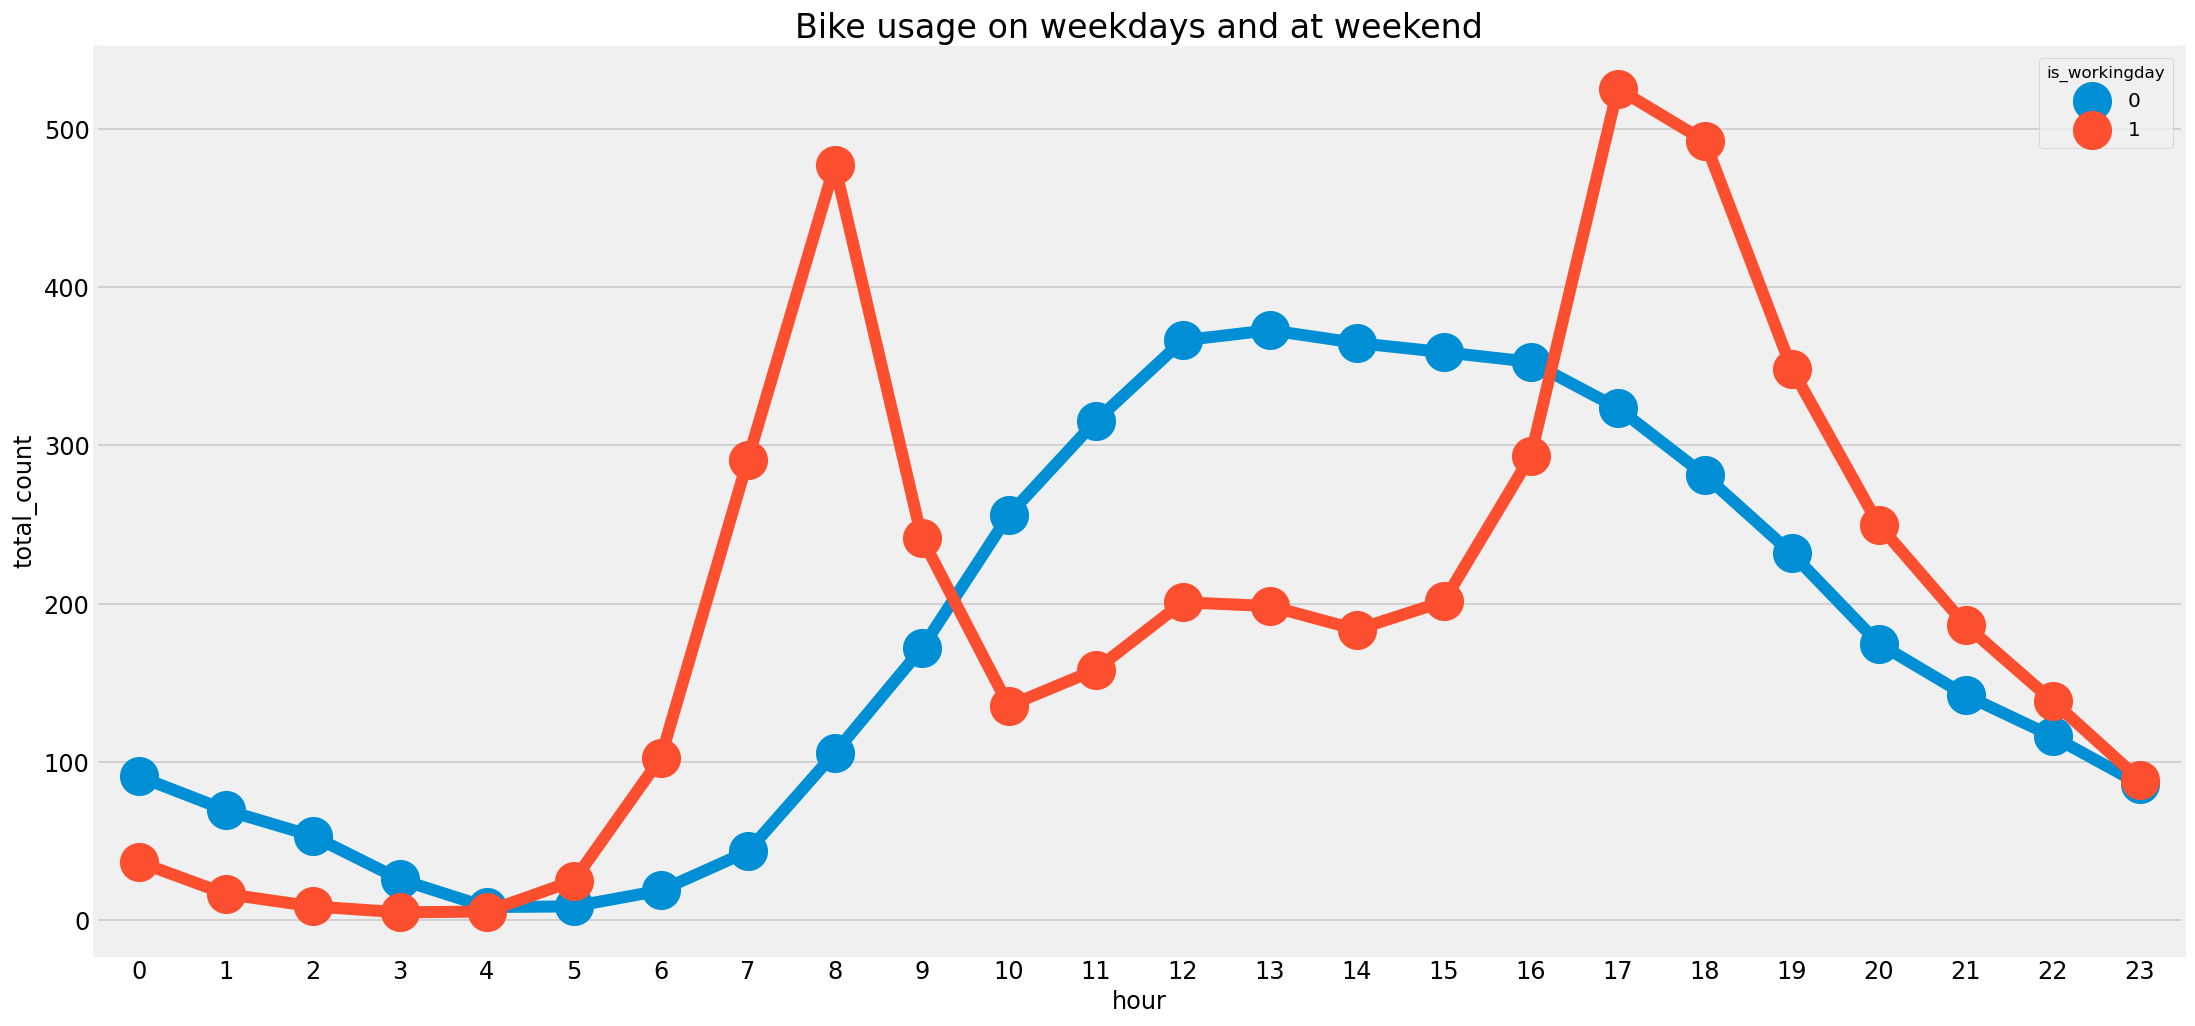

In [11]:
data_working = get_grouped_average(["hour", "is_workingday"])

fig, ax = plt.subplots()
sns.pointplot(x="hour", y="total_count", 
              hue="is_workingday", 
              data=data_working, ax=ax)
plt.title("Bike usage on weekdays and at weekend", size=20)
#plt.savefig("bike_shire.png", dpi=80);

## Monthly distribution of bikes usage

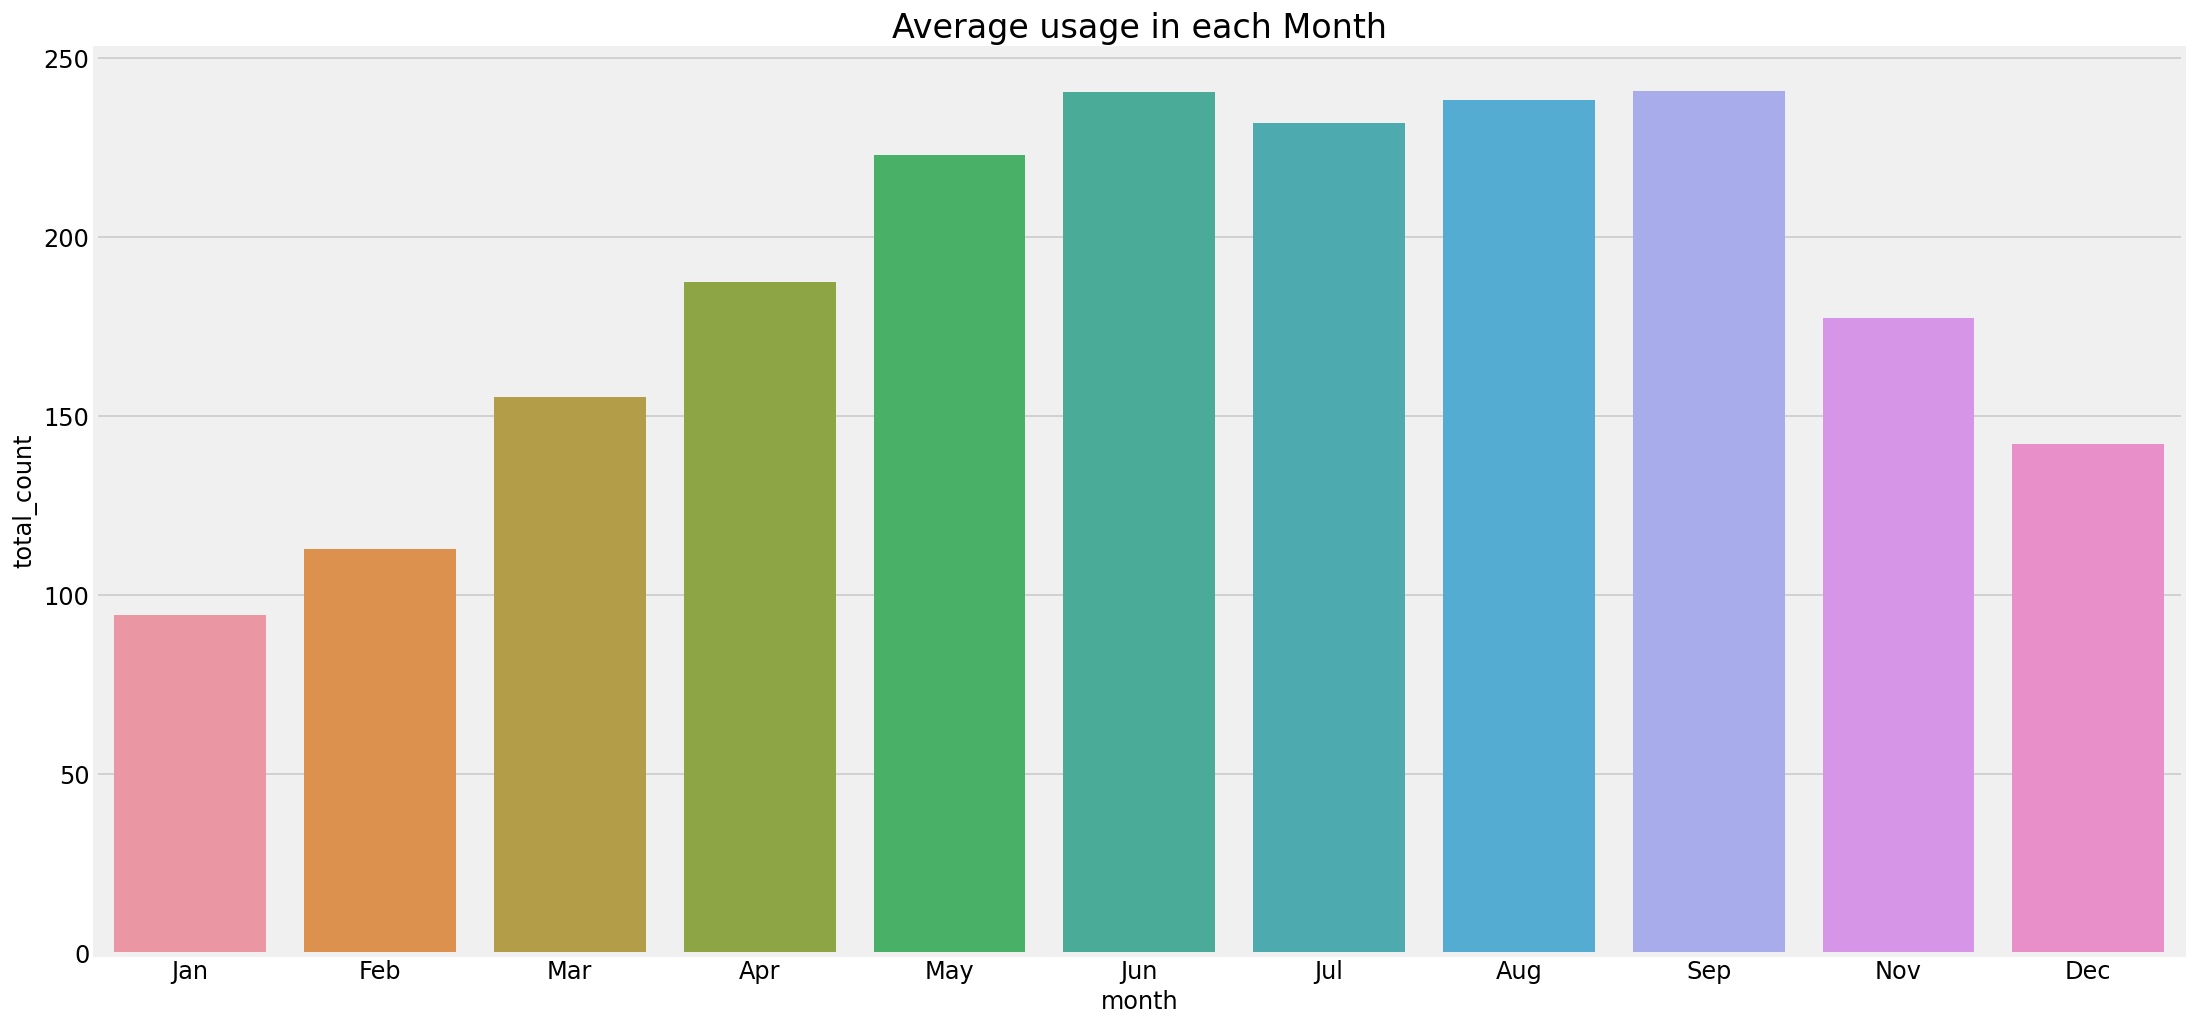

In [12]:
data_month = get_grouped_average(["month"])

month_order = ["Jan", "Feb", "Mar", "Apr",
               "May", "Jun", "Jul", "Aug",
               "Sep", "Nov", "Dec"]

sns.barplot(x="month", y="total_count", 
            data=data_month, order=month_order)
plt.title("Average usage in each Month", size=20);

* Usage of bike mostly lies in June to September.
* Fall seems to be favorite time of the year to use bicycles.
* weather or season

## Seasons and weather

In [13]:
season = get_grouped_average(["season"])

In [14]:
season

,season,total_count
0,fall,198.868856
1,spring,208.344069
2,summer,236.016237
3,winter,111.114569


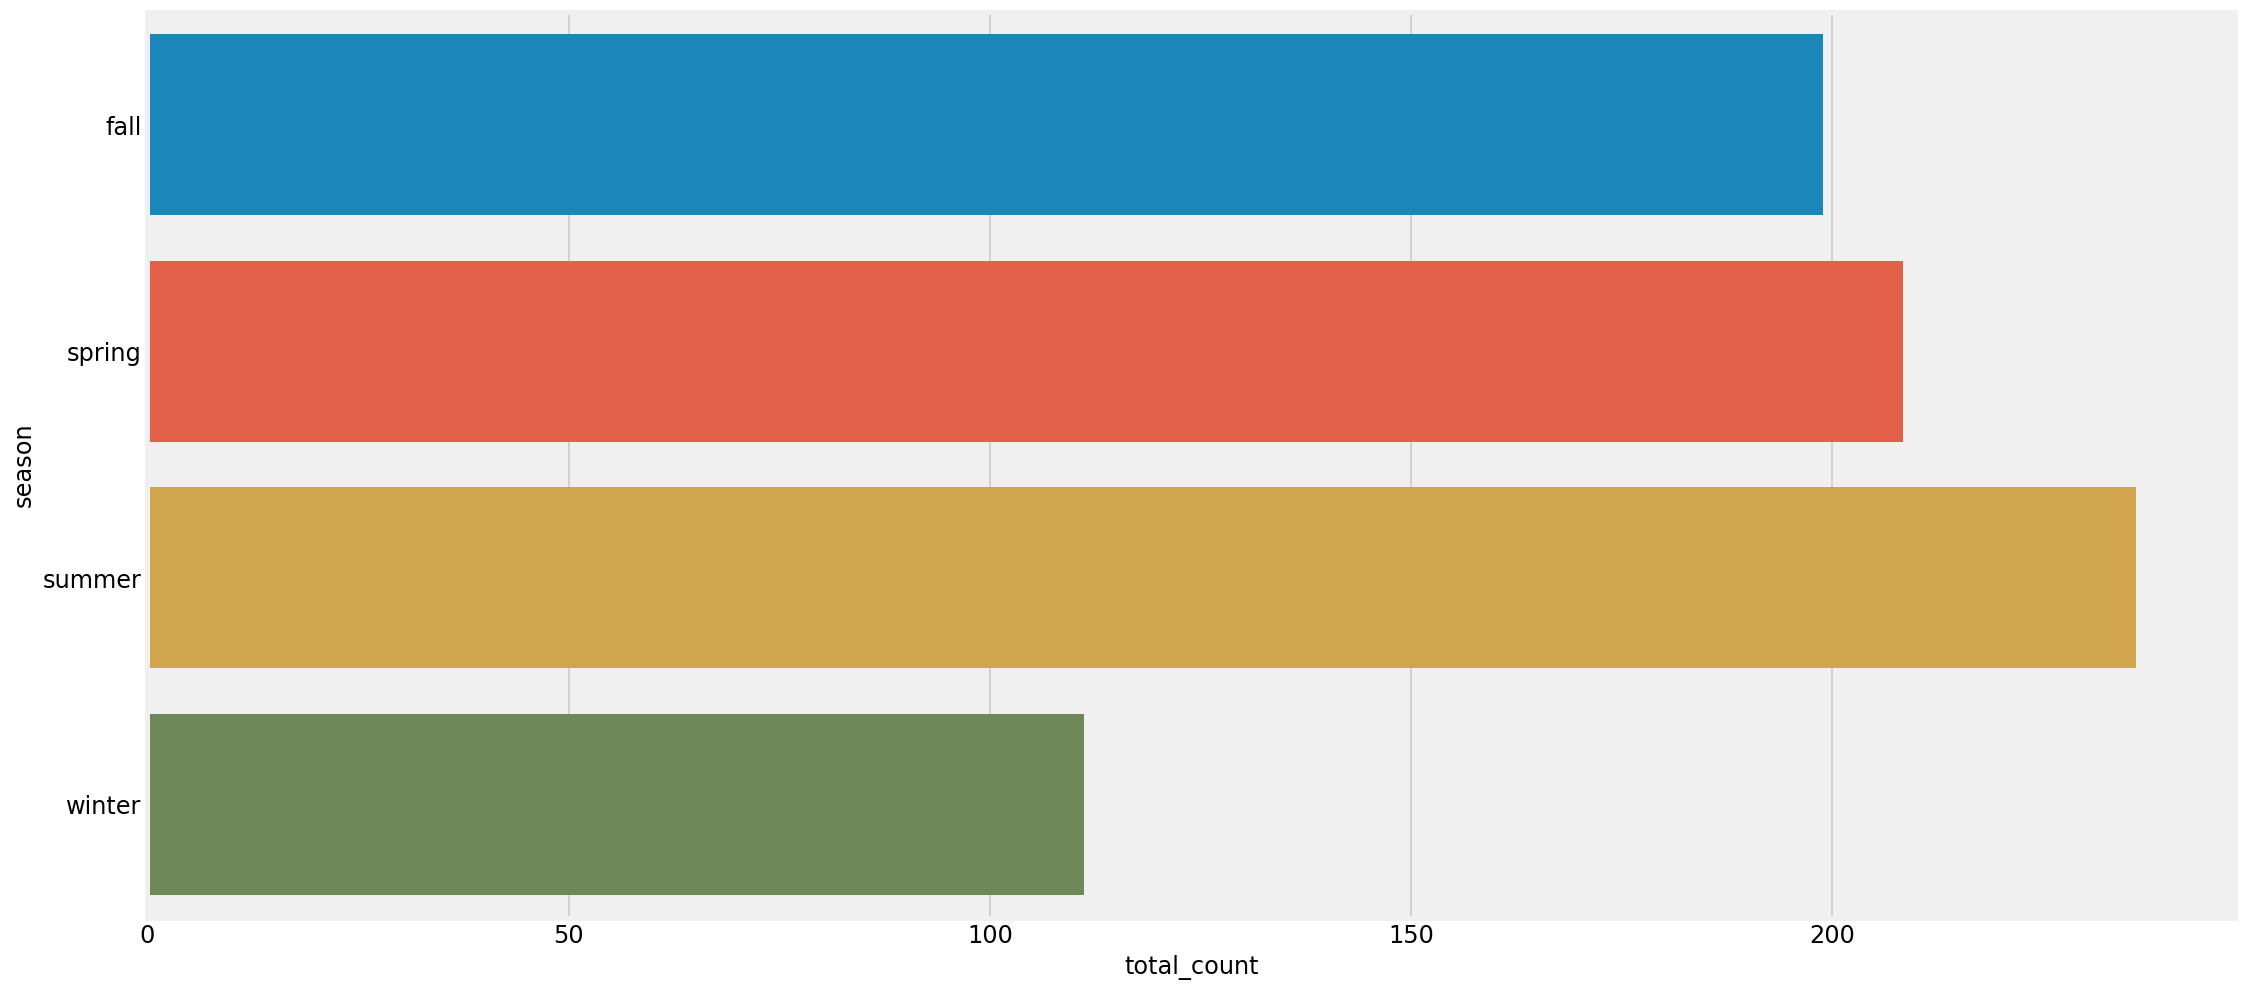

In [15]:
sns.barplot(y="season", x="total_count",data=season);

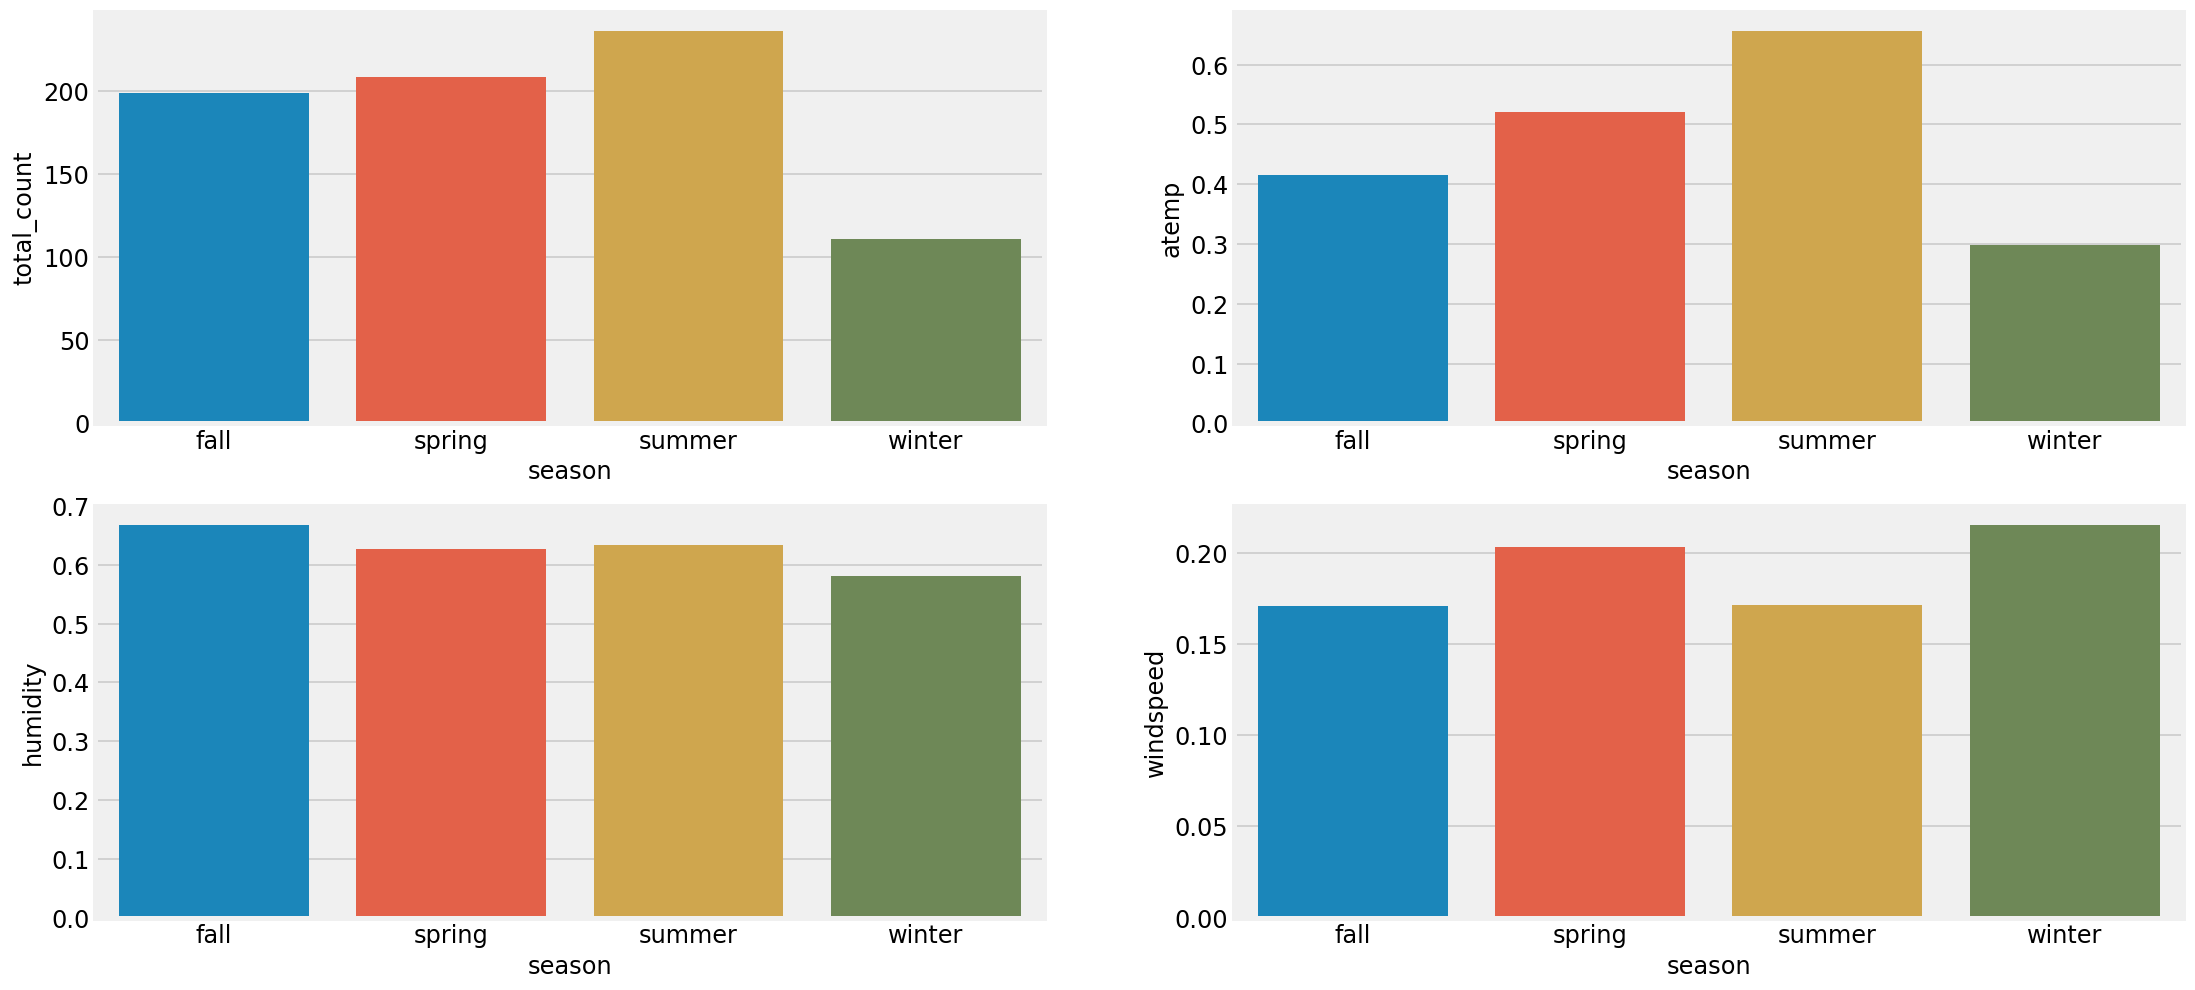

In [16]:
weather_variables = ["atemp", "humidity", "windspeed", "total_count"]
season_weather = get_grouped_average(["season"], weather_variables)

fig, ax = plt.subplots(2,2)
cols = ["total_count", "atemp", "humidity", "windspeed"]
for col, axis in zip(cols, ax.flatten()):
    sns.barplot(x="season", y=col, 
                data=season_weather, 
                ax=axis)

In [17]:
weather = hour_df[weather_variables+["season"]]
weather.corr()

,atemp,humidity,windspeed,total_count
atemp,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.062336,-0.290105,1.000000,0.093234
total_count,0.400929,-0.322911,0.093234,1.000000


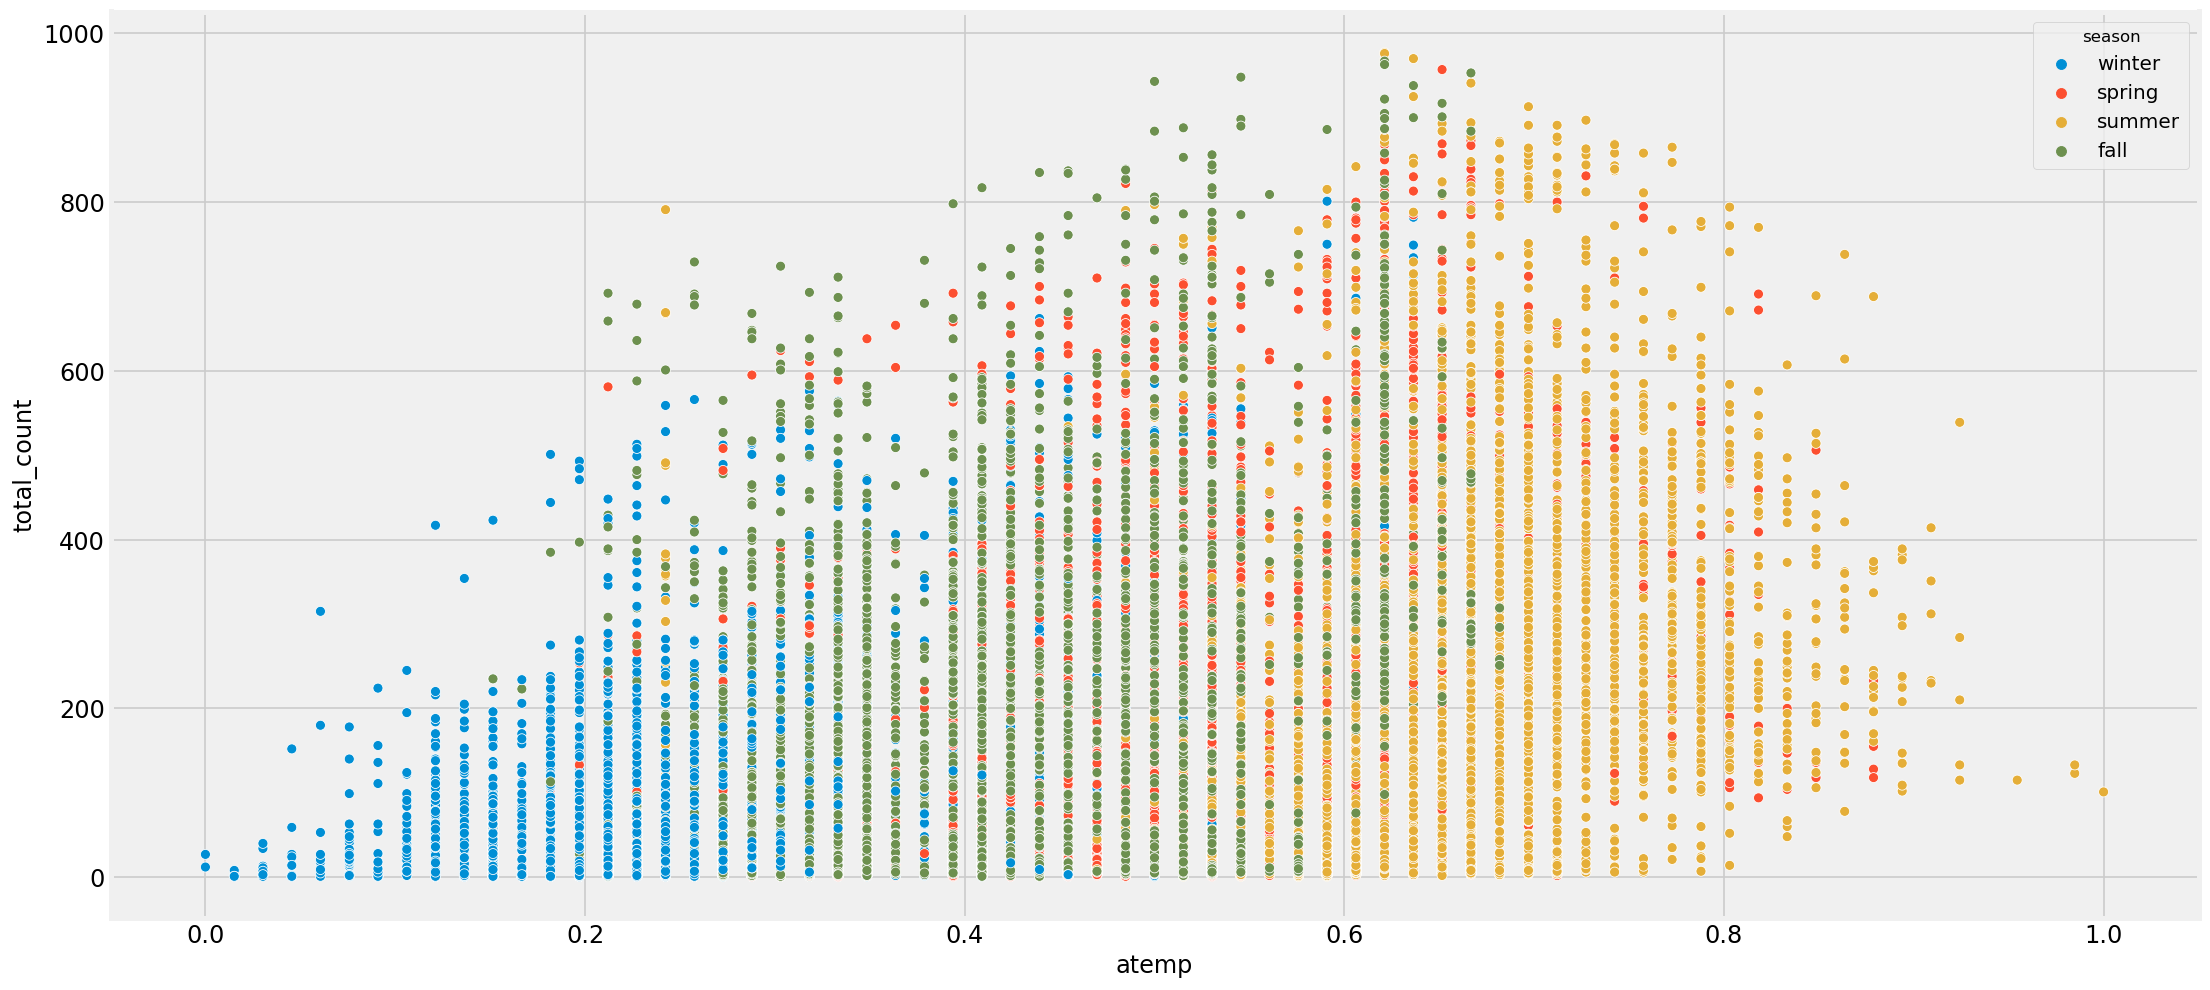

In [18]:
sns.scatterplot(x='atemp', y="total_count",
                data=weather, hue='season');

In [19]:
weather_monthly = get_grouped_average(["month"], ["atemp", "humidity", "windspeed", "total_count"])
weather_monthly

,month,atemp,humidity,windspeed,total_count
0,Apr,0.457110,0.588114,0.234323,187.260960
1,Aug,0.651556,0.637227,0.171468,238.097627
2,Dec,0.326296,0.666116,0.176574,142.303439
3,Feb,0.300621,0.567211,0.215961,112.865026
4,Jan,0.240676,0.580931,0.207551,94.424773
5,Jul,0.704094,0.597876,0.166059,231.819892
6,Jun,0.638246,0.575806,0.185420,240.515278
7,Mar,0.382299,0.589050,0.222517,155.410726
8,May,0.565662,0.688958,0.182989,222.907258
9,Nov,0.367339,0.625045,0.183764,177.335421


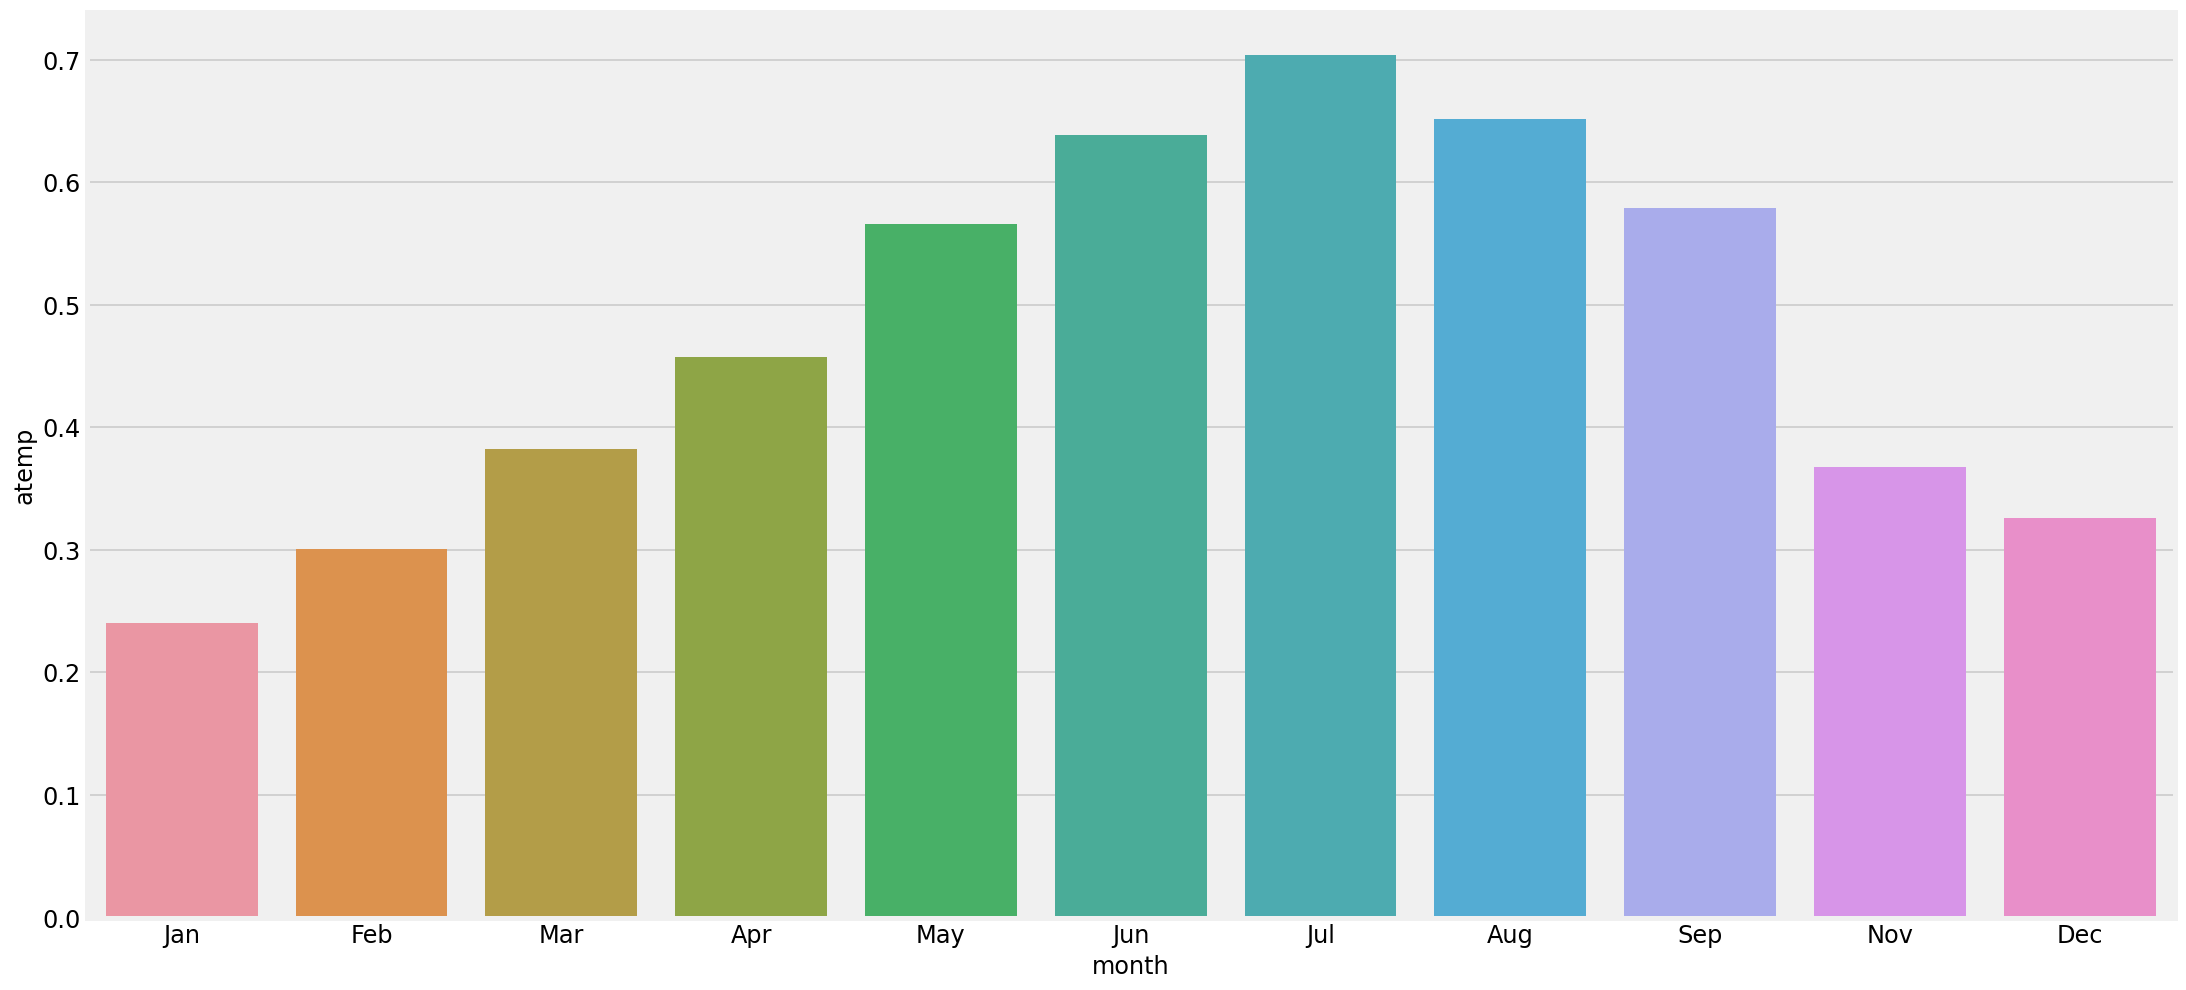

In [20]:
sns.barplot(x="month", y='atemp', data=weather_monthly,
            order=month_order);

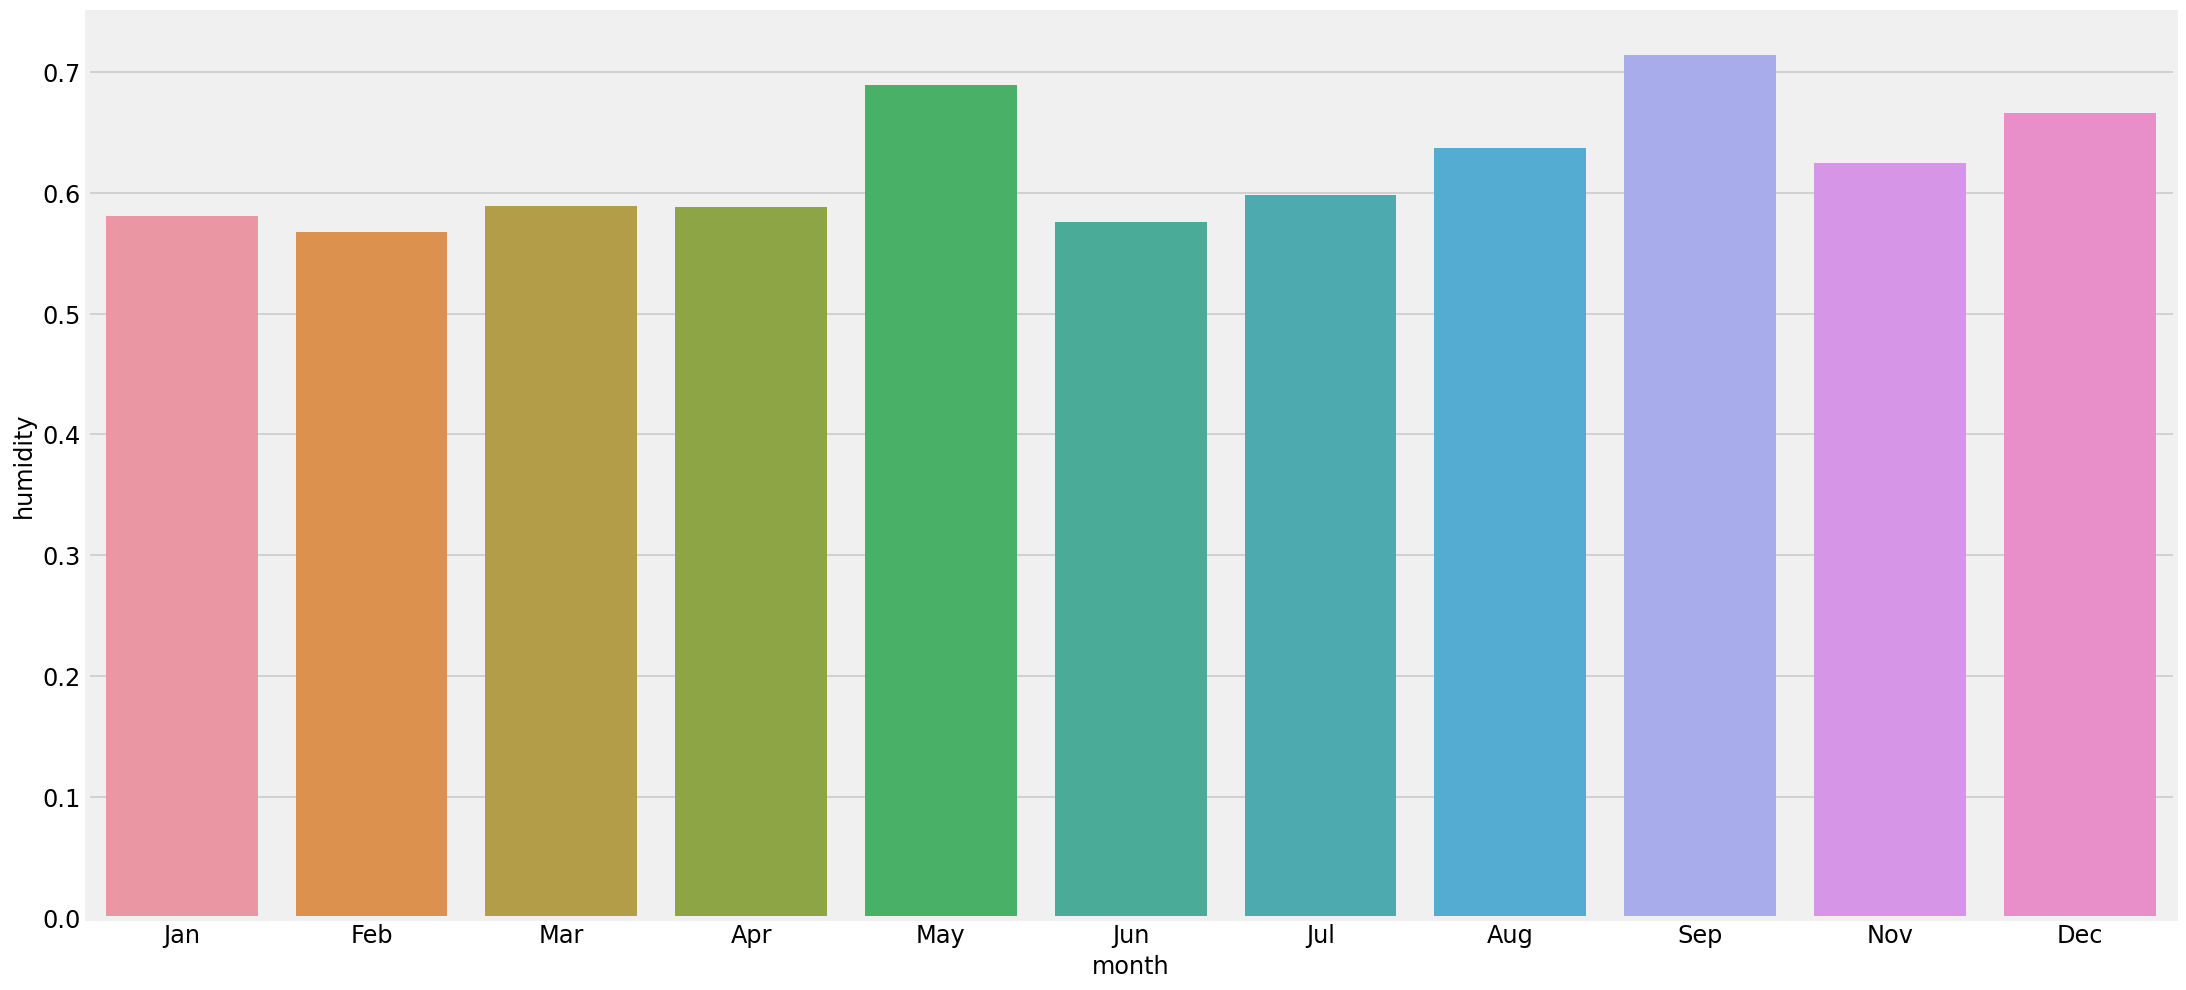

In [21]:
sns.barplot(x="month", y='humidity', data=weather_monthly,
            order=month_order);

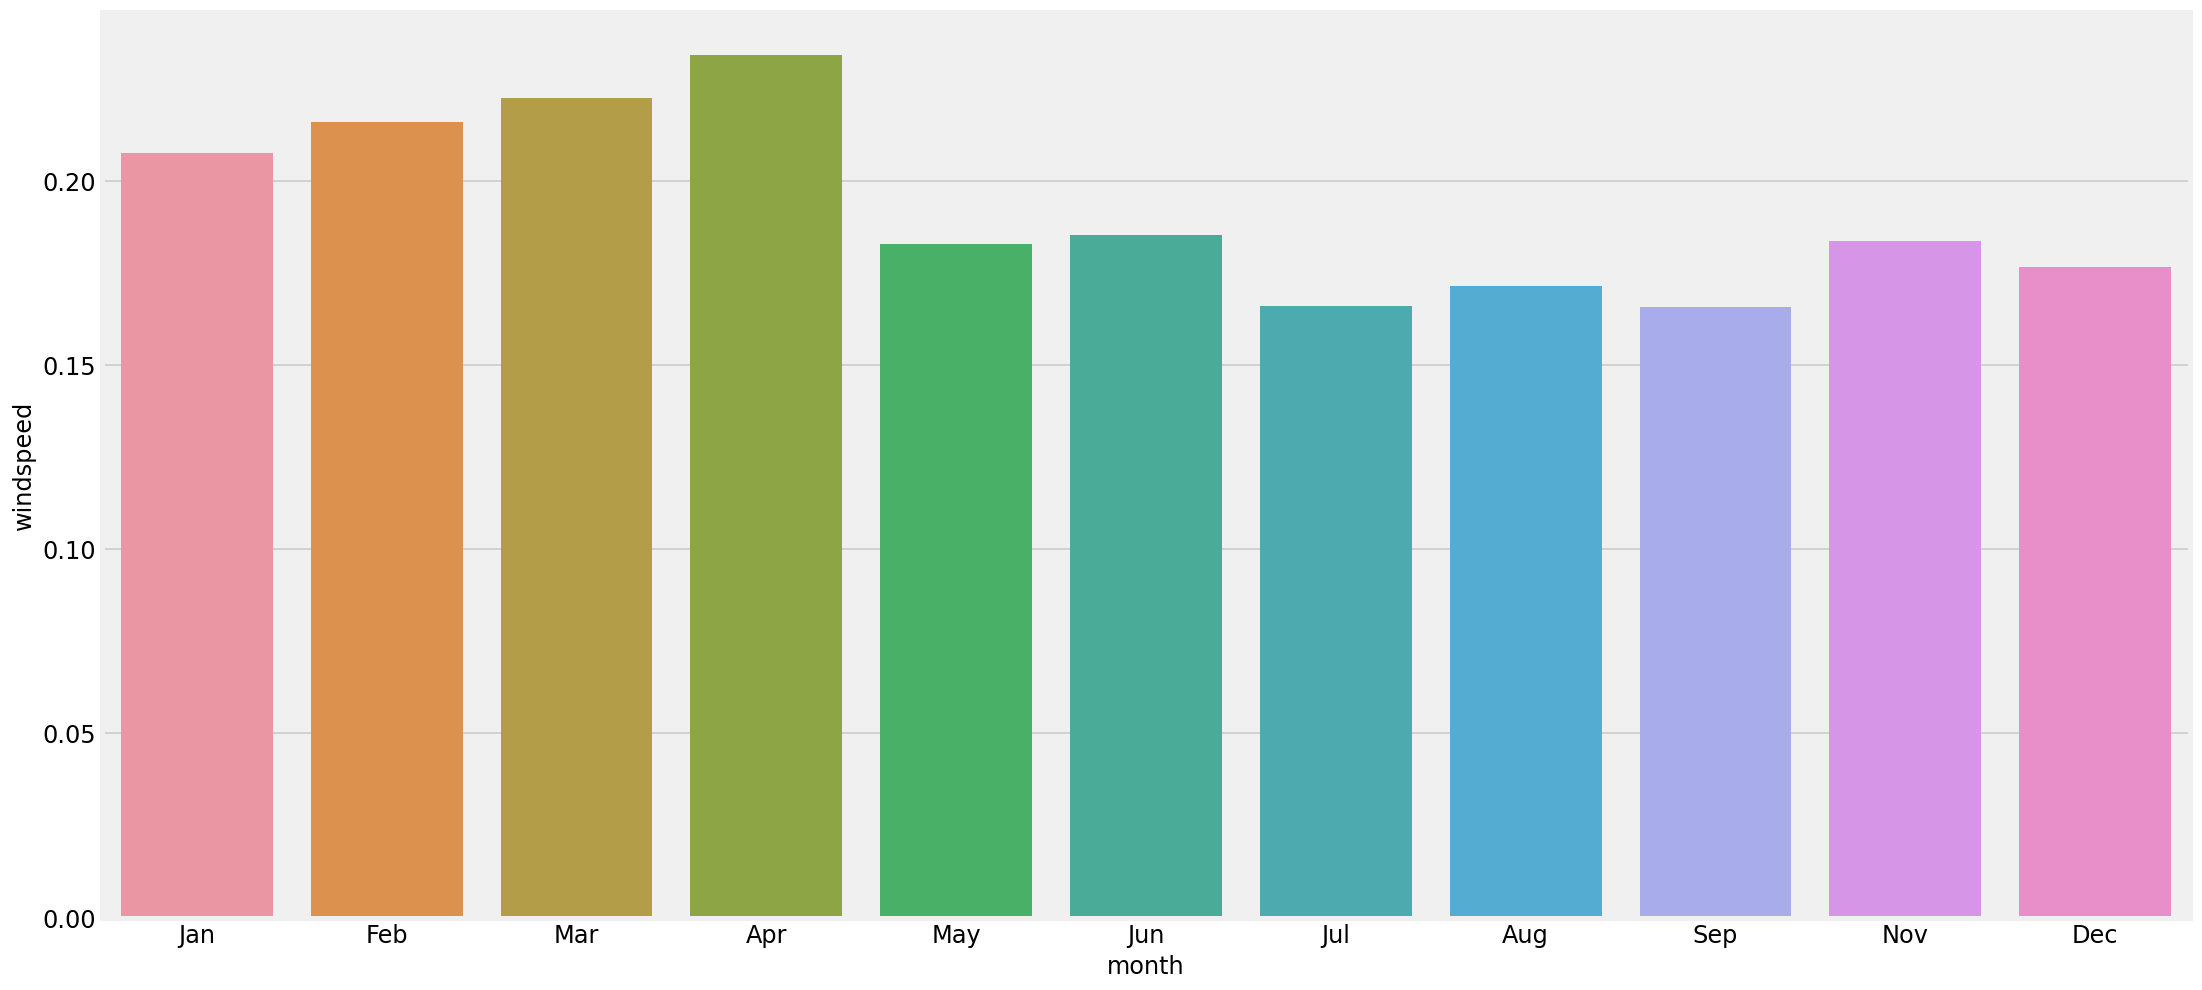

In [22]:
sns.barplot(x="month", y='windspeed', data=weather_monthly,
            order=month_order);

# Registered or not

In [23]:
hour_df[["registered", "casual"]].describe()

,registered,casual
count,17379.000000,17379.000000
mean,153.786869,35.676218
std,151.357286,49.305030
min,0.000000,0.000000
25%,34.000000,4.000000
50%,115.000000,17.000000
75%,220.000000,48.000000
max,886.000000,367.000000


## Hourly

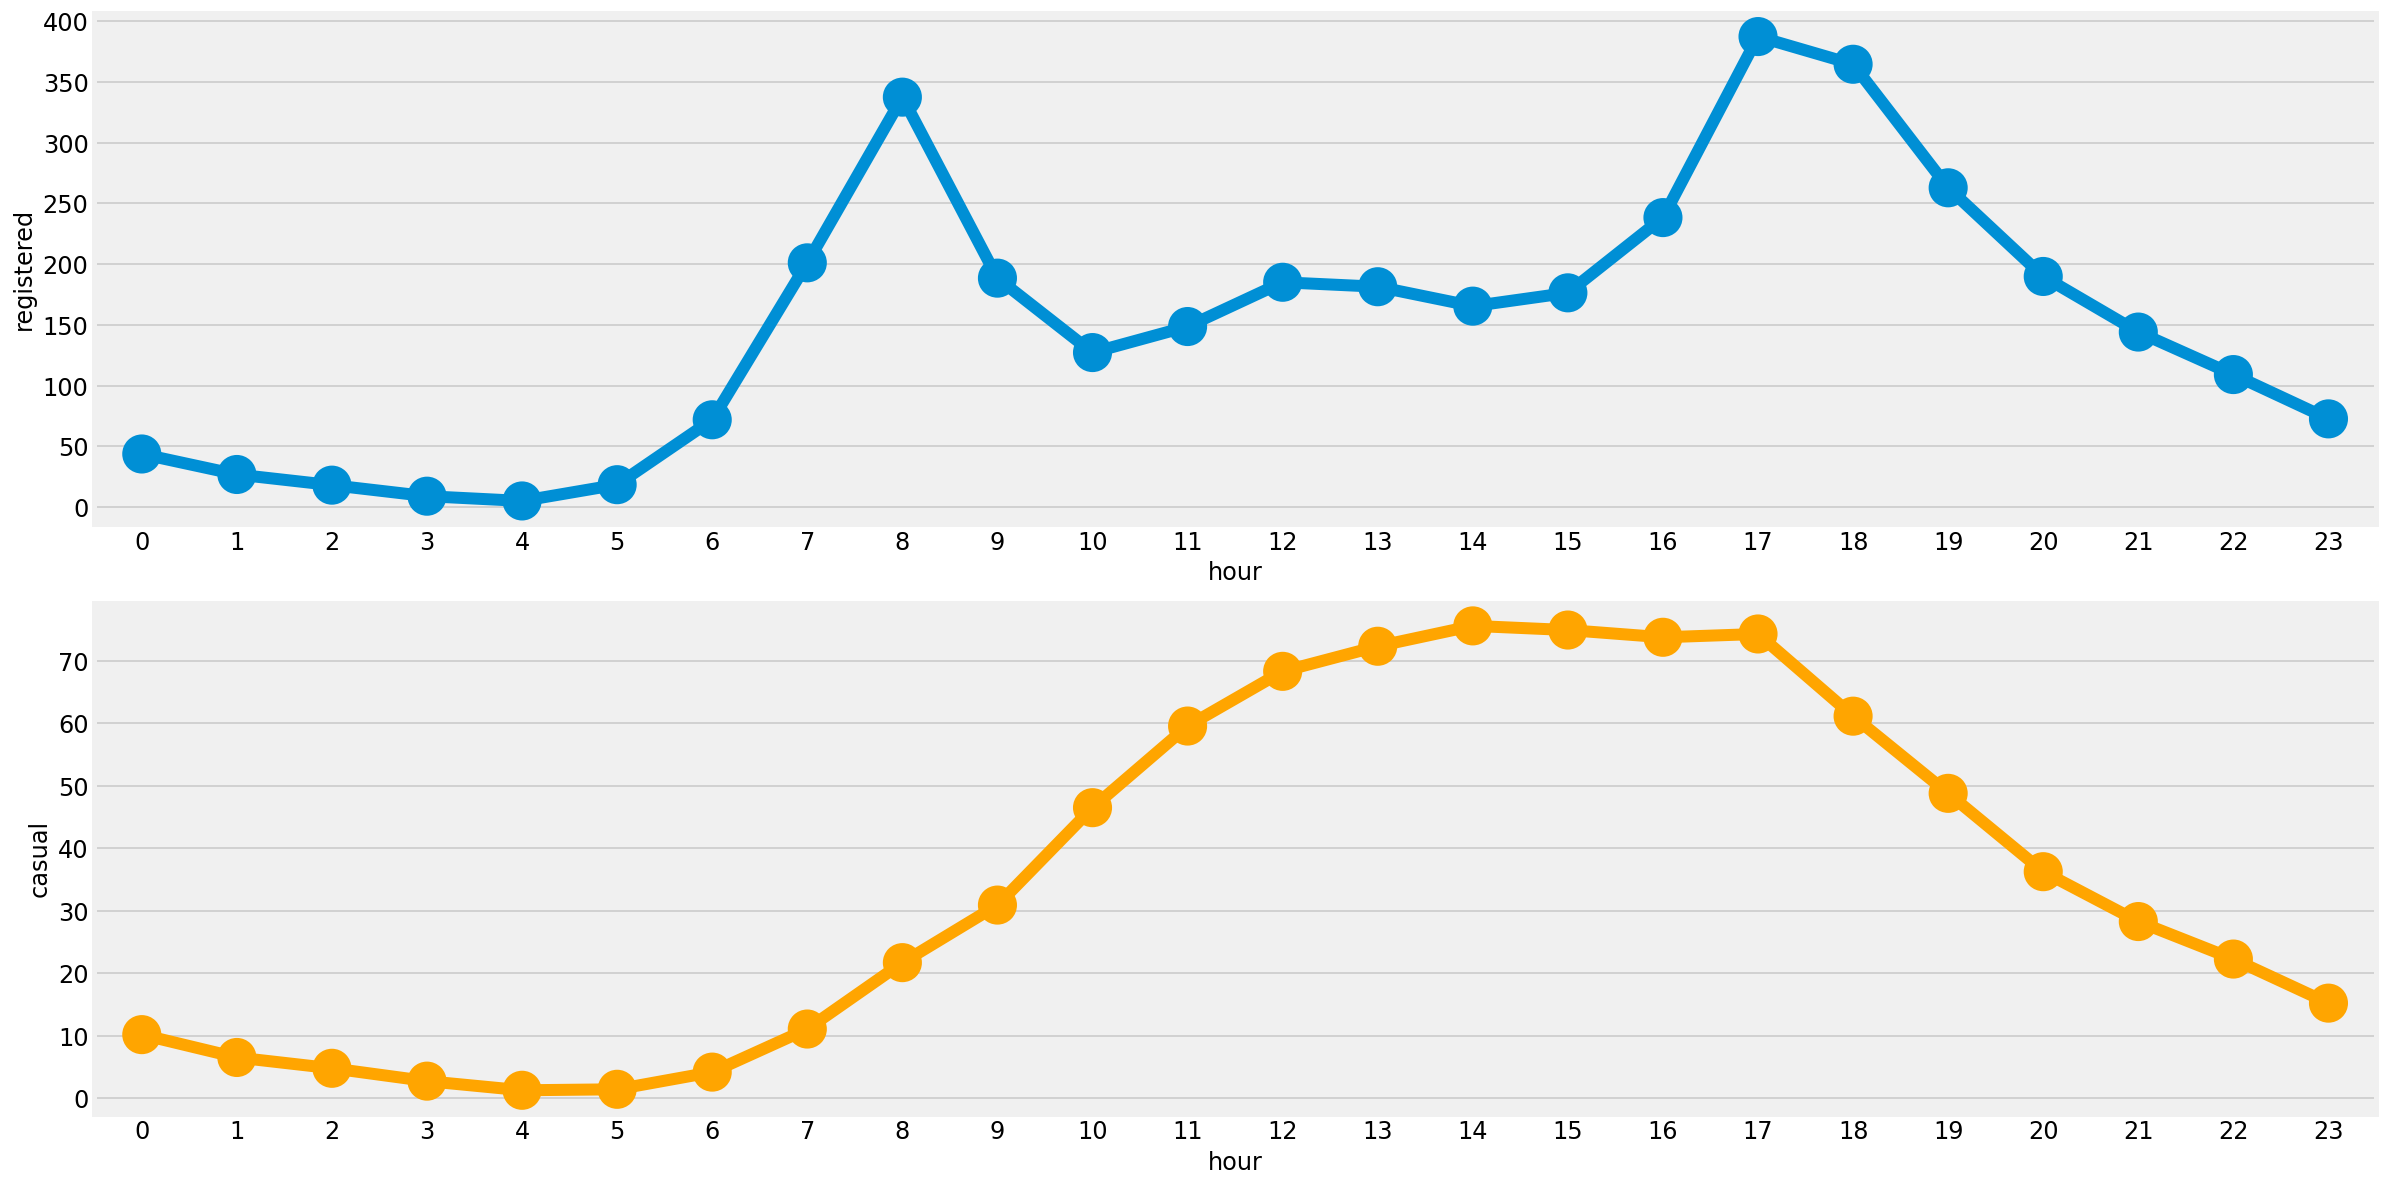

In [24]:
register_hourly = get_grouped_average(["hour"], ["registered", "casual"])

fig, ax = plt.subplots(2,1)

sns.pointplot(x='hour', y="registered",
              data=register_hourly, label="registered",
              ax=ax[0])
sns.pointplot(x='hour', y="casual", color="orange",
              data=register_hourly, label="registered",
              ax=ax[1])
plt.tight_layout();

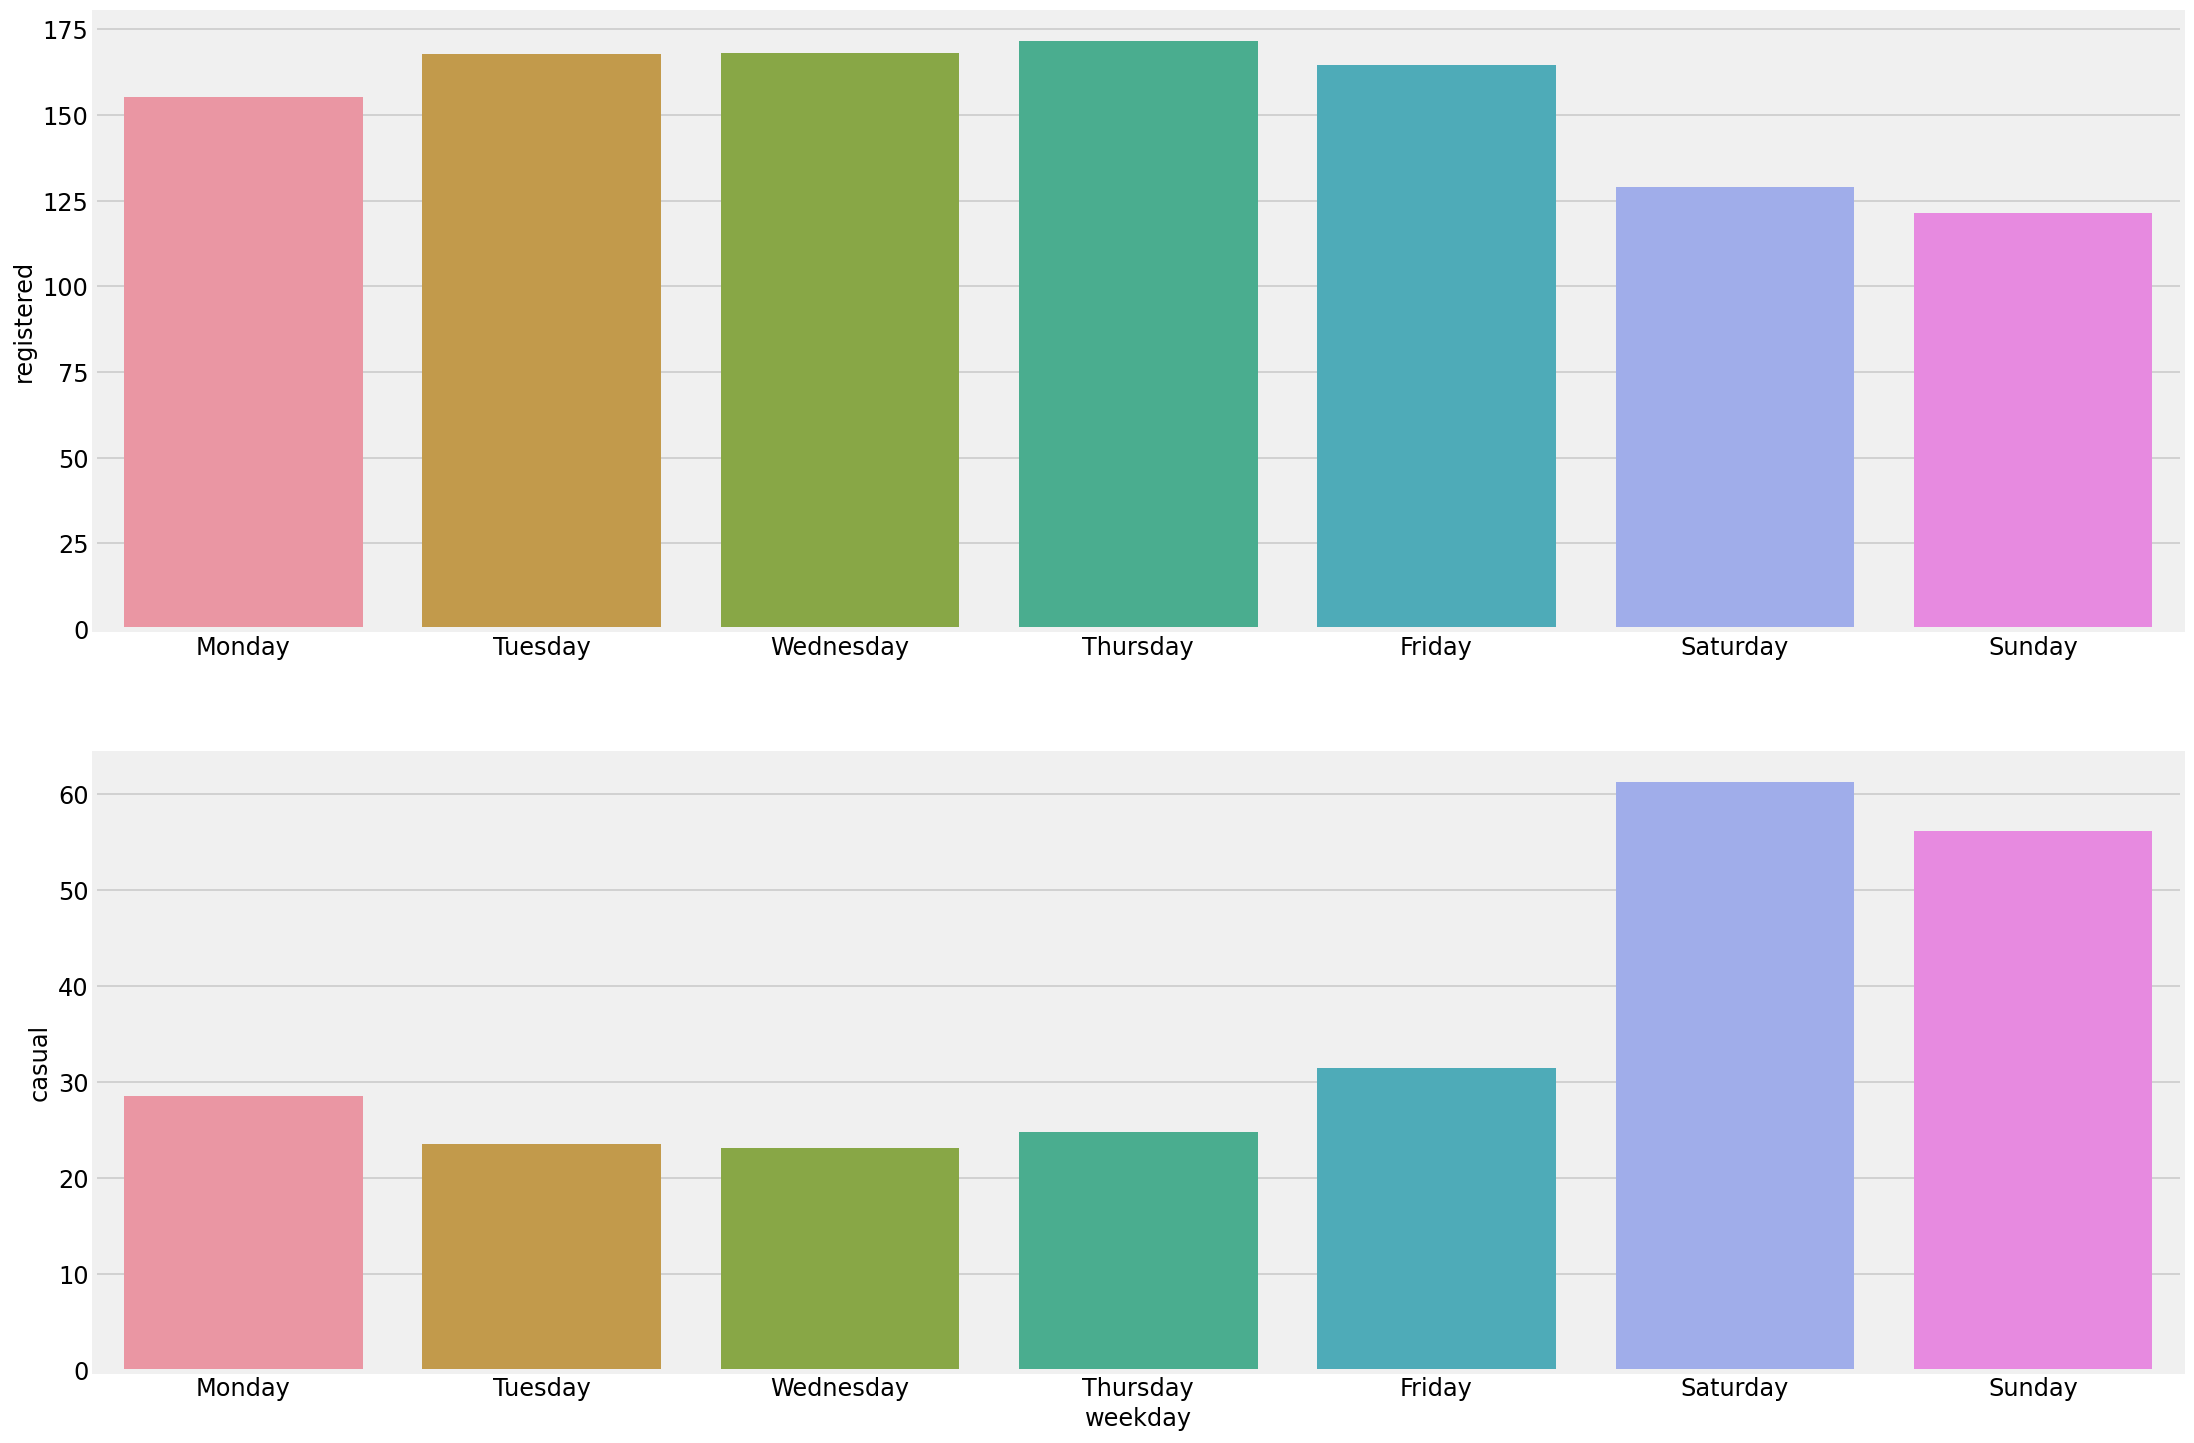

In [25]:
register_day = get_grouped_average(["weekday"], ["registered", "casual"])
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday",
             "Friday", "Saturday","Sunday"]

fig, ax=plt.subplots(2,1, figsize=(20, 15))
sns.barplot(x="weekday", y="registered", 
            data=register_day, order=day_order,
            ax=ax[0])
ax[0].set_xlabel(None)
sns.barplot(x="weekday", y="casual", 
            data=register_day, order=day_order,
            ax=ax[1]);

Summary